<a href="https://colab.research.google.com/github/adeakinwe/ML_Mastery/blob/main/convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMPARE SIMPLE NEURAL NETWORK AND CONVOLUTIONAL NEURAL NETWORK (CNN)

Simple Neural Network (Multi-layer perceptrons)

In [2]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


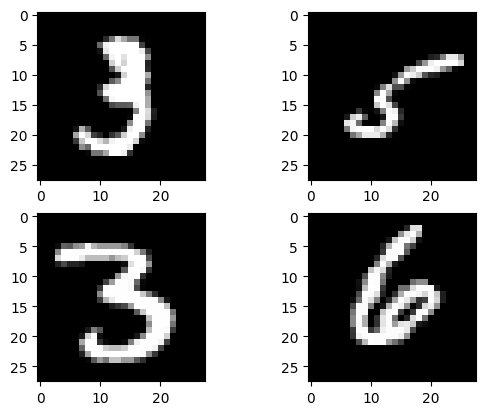

In [3]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[11], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[12], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[13], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

In [5]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [6]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
print(num_pixels)

784


In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
print(num_classes)

10


In [12]:
# define baseline model
def baseline_model():
# create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer= 'normal' , activation= 'relu' ))
  model.add(Dense(num_classes, kernel_initializer= 'normal' , activation= 'softmax' ))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
  return model

In [13]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 3s - loss: 0.2770 - accuracy: 0.9209 - val_loss: 0.1360 - val_accuracy: 0.9594 - 3s/epoch - 10ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1102 - accuracy: 0.9685 - val_loss: 0.0924 - val_accuracy: 0.9719 - 787ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0703 - accuracy: 0.9799 - val_loss: 0.0745 - val_accuracy: 0.9771 - 833ms/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0501 - accuracy: 0.9849 - val_loss: 0.0697 - val_accuracy: 0.9777 - 832ms/epoch - 3ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0366 - accuracy: 0.9896 - val_loss: 0.0621 - val_accuracy: 0.9797 - 808ms/epoch - 3ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0264 - accuracy: 0.9930 - val_loss: 0.0623 - val_accuracy: 0.9798 - 975ms/epoch - 3ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0192 - accuracy: 0.9952 - val_loss: 0.0626 - val_accuracy: 0.9800 - 1s/epoch - 5ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0138 - accuracy: 0.9972 - val_loss: 0.0591 - val_accuracy: 0.9821 - 1s/epoch - 4ms/step
Epoch 9/

CONVNETS (CNN)

In [30]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
K.set_image_data_format('channels_first')

In [31]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [32]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [33]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [34]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [35]:
def baseline_model():
  # create model
  model = Sequential()
  model.add(Convolution2D(32, 5, 5, padding= 'same' , input_shape=(1, 28, 28),
  activation= 'relu' ))
  model.add(MaxPooling2D(pool_size=(2, 2), padding= 'same'))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation= 'relu' ))
  model.add(Dense(num_classes, activation= 'softmax' ))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
  return model

In [36]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 3s - loss: 0.8681 - accuracy: 0.7329 - val_loss: 0.4044 - val_accuracy: 0.8806 - 3s/epoch - 10ms/step
Epoch 2/10
300/300 - 1s - loss: 0.4211 - accuracy: 0.8676 - val_loss: 0.2903 - val_accuracy: 0.9132 - 954ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.3405 - accuracy: 0.8927 - val_loss: 0.2337 - val_accuracy: 0.9296 - 932ms/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.2966 - accuracy: 0.9064 - val_loss: 0.2156 - val_accuracy: 0.9303 - 870ms/epoch - 3ms/step
Epoch 5/10
300/300 - 1s - loss: 0.2675 - accuracy: 0.9152 - val_loss: 0.1904 - val_accuracy: 0.9421 - 932ms/epoch - 3ms/step
Epoch 6/10
300/300 - 1s - loss: 0.2498 - accuracy: 0.9201 - val_loss: 0.1804 - val_accuracy: 0.9420 - 896ms/epoch - 3ms/step
Epoch 7/10
300/300 - 1s - loss: 0.2260 - accuracy: 0.9278 - val_loss: 0.1694 - val_accuracy: 0.9456 - 861ms/epoch - 3ms/step
Epoch 8/10
300/300 - 1s - loss: 0.2213 - accuracy: 0.9297 - val_loss: 0.1550 - val_accuracy: 0.9522 - 861ms/epoch - 3ms/step
Ep

In [42]:
#More convnets layer

def larger_baseline_model():
  # create model
  model = Sequential()
  model.add(Convolution2D(30, 5, 5, input_shape=(1, 28, 28), padding= 'same', activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2) , padding= 'same'))
  model.add(Convolution2D(15, 3, 3,  padding= 'same', activation= 'relu' ))
  model.add(MaxPooling2D(pool_size=(2, 2), padding= 'same'))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation= 'relu'))
  model.add(Dense(50, activation= 'relu'))
  model.add(Dense(num_classes, activation= 'softmax'))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
  return model

In [43]:
# build the model
model = larger_baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 3s - loss: 1.2424 - accuracy: 0.5670 - val_loss: 0.5946 - val_accuracy: 0.8080 - 3s/epoch - 9ms/step
Epoch 2/10
300/300 - 1s - loss: 0.6695 - accuracy: 0.7746 - val_loss: 0.4088 - val_accuracy: 0.8660 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.5221 - accuracy: 0.8260 - val_loss: 0.3137 - val_accuracy: 0.8992 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.4508 - accuracy: 0.8510 - val_loss: 0.2663 - val_accuracy: 0.9159 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 2s - loss: 0.4075 - accuracy: 0.8648 - val_loss: 0.2562 - val_accuracy: 0.9154 - 2s/epoch - 5ms/step
Epoch 6/10
300/300 - 1s - loss: 0.3800 - accuracy: 0.8743 - val_loss: 0.2373 - val_accuracy: 0.9208 - 1s/epoch - 5ms/step
Epoch 7/10
300/300 - 1s - loss: 0.3600 - accuracy: 0.8821 - val_loss: 0.2193 - val_accuracy: 0.9281 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.3407 - accuracy: 0.8896 - val_loss: 0.2164 - val_accuracy: 0.9284 - 1s/epoch - 3ms/step
Epoch 9/10
300/300 - 1s 